In [3]:
import warnings

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

from get_data import get_balanced_exoplanet_data, get_scaled_balanced_exoplanet_data

warnings.simplefilter("ignore")

In [4]:
x_train, x_test, y_train, y_test = get_balanced_exoplanet_data()
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = get_scaled_balanced_exoplanet_data()

## Test model

0.8985148514851485


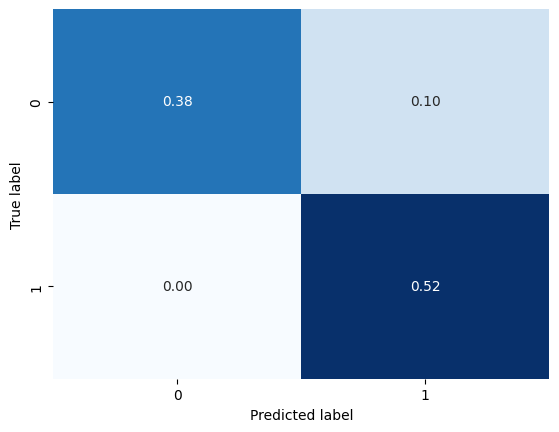

In [5]:
# Parameters
lmbda = 1e-4  # l2 regularization term
n_epochs = 1000  # number of epoch iterations
rng_seed = 2023  # random number generator seed
cmap = "Blues"  # colormap
fmt = ".2f"  # format

model = LogisticRegression(
    C=1 / lmbda,
    penalty="l2",
    max_iter=n_epochs,
    tol=1e-4,
    solver="lbfgs",
    random_state=rng_seed,
)
model.fit(x_train, y_train.ravel())
pred = model.predict(x_test)

# Confusion matrix
sns.heatmap(
    confusion_matrix(y_test, pred, normalize="all"),
    annot=True,
    cmap=cmap,
    cbar=False,
    fmt=fmt,
)
plt.xlabel("Predicted label")
plt.ylabel("True label")

# Metrics
print(accuracy_score(y_test, pred))

## Try if scaling improves performance

0.9787128712871287


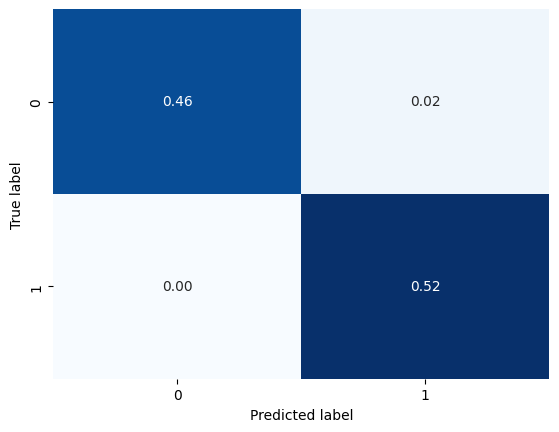

In [6]:
# Parameters
lmbda = 1e-4  # l2 regularization term

model = LogisticRegression(
    C=1 / lmbda,
    penalty="l2",
    max_iter=n_epochs,
    tol=1e-4,
    solver="lbfgs",
    random_state=rng_seed,
)
model.fit(x_train_scaled, y_train_scaled.ravel())
pred = model.predict(x_test_scaled)

# Confusion matrix
sns.heatmap(
    confusion_matrix(y_test_scaled, pred, normalize="all"),
    annot=True,
    cmap=cmap,
    cbar=False,
    fmt=fmt,
)
plt.xlabel("Predicted label")
plt.ylabel("True label")

# Metrics
print(accuracy_score(y_test_scaled, pred))

#### Scaling does improve performance here

## Plot accuracy as function of lambda l2 regularization

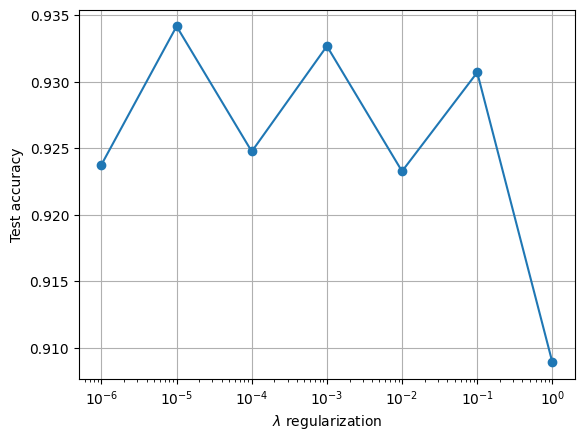

In [5]:
# Parameters
lmbdas = np.logspace(-6, 0, 7)  # l2 regularization
filename = "../results/figures/logreg_accuracy_plot.png"
n_epochs = 100

accuracies = list()

for i, lmbda in enumerate(lmbdas):
    model = LogisticRegression(
        C=1 / lmbda,
        penalty="l2",
        max_iter=n_epochs,
        tol=1e-4,
        solver="lbfgs",
        random_state=rng_seed,
    )
    model.fit(x_train_scaled, y_train_scaled.ravel())
    pred = model.predict(x_test_scaled)
    accuracies.append(accuracy_score(y_test_scaled, pred))

plt.plot(lmbdas, accuracies, "-o")
plt.xlabel("$\lambda$ regularization")
plt.ylabel("Test accuracy")
plt.xticks(lmbdas)
plt.xscale("log")
plt.grid(True)
if filename:
    plt.savefig(filename)
plt.show()

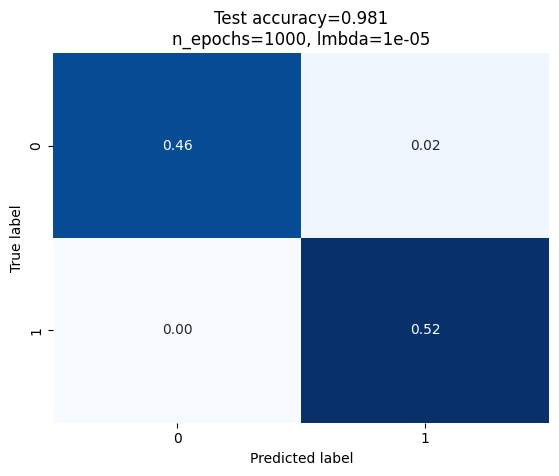

In [8]:
# Parameters
lmbda = 1e-5  # l2 regularization term
n_epochs = 1000 
filename = "../results/figures/logreg_conf_matrix.png"

model = LogisticRegression(
    C=1 / lmbda,
    penalty="l2",
    max_iter=n_epochs,
    tol=1e-4,
    solver="lbfgs",
    random_state=rng_seed,
)
model.fit(x_train_scaled, y_train_scaled.ravel())
pred = model.predict(x_test_scaled)

# Confusion matrix
sns.heatmap(
    confusion_matrix(y_test_scaled, pred, normalize="all"),
    annot=True,
    cmap=cmap,
    cbar=False,
    fmt=fmt,
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title(
    f"Test accuracy={accuracy_score(y_test_scaled, pred):.3f}\n"
    + f"{n_epochs=}, {lmbda=}"
)
plt.savefig(filename)
plt.show();